<a href="https://colab.research.google.com/github/trannolis/data/blob/main/Nick_Tran_MMDS_spring_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports and options

import pandas as pd
pd.set_option('display.max_colwidth', - 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


# Retrieving the Data

For this assignment you will be working with the Construction and Demolition dataset issued by the DOB (Department of Buildings) and published on NYC Open Data (https://opendata.cityofnewyork.us/). NYC Open Data provides multiple free datasets like this one, and is a great source for data science projects.

This dataset is really big, so we are only going to be using the first 2 Million rows. Even so, the code block below might take bit of time...

In [ ]:
df = pd.read_csv("https://data.cityofnewyork.us/resource/ipu4-2q9a.csv?$limit=2000000")
df.head(20)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,8,9,10,15,31,33,34,35,36,51,52) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,borough,bin__,house__,street_name,job__,job_doc___,job_type,self_cert,block,lot,community_board,zip_code,bldg_type,residential,special_district_1,special_district_2,work_type,permit_status,filing_status,permit_type,permit_sequence__,permit_subtype,oil_gas,site_fill,filing_date,issuance_date,expiration_date,job_start_date,permittee_s_first_name,permittee_s_last_name,permittee_s_business_name,permittee_s_phone__,permittee_s_license_type,permittee_s_license__,act_as_superintendent,permittee_s_other_title,hic_license,site_safety_mgr_s_first_name,site_safety_mgr_s_last_name,site_safety_mgr_business_name,superintendent_first___last_name,superintendent_business_name,owner_s_business_type,non_profit,owner_s_business_name,owner_s_first_name,owner_s_last_name,owner_s_house__,owner_s_house_street_name,city,state,owner_s_zip_code,owner_s_phone__,dobrundate,permit_si_no,gis_latitude,gis_longitude,gis_council_district,gis_census_tract,gis_nta_name
0,MANHATTAN,1077287,1230,6TH AVENUE,123725807,1,A2,Y,1264,5,105,10020.0,2.0,NaN,MID,NaN,OT,ISSUED,RENEWAL,EW,2,OT,NaN,NOT APPLICABLE,12/11/2020,12/11/2020,11/02/2021,12/23/2019,COLM,MORRISSEY,COYLE CONTRACTING CORP,2.12511e+09,GC,0608236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CORPORATION,N,TISHMAN SPEYER,GEOFF,ROSS,45,ROCKEFELLER PLAZA,NEW YORK,NY,10111,2.12715e+09,12/12/2020 00:00:00,3554580,40.758977,-73.981089,4.0,96.0,Midtown-Midtown South
1,STATEN ISLAND,5113169,715,OCEAN TERRACE,500876037,1,A2,Y,683,1,502,10301.0,2.0,NaN,NA-1,NaN,OT,ISSUED,RENEWAL,EW,3,OT,NaN,USE UNDER 300 CU.YD,12/11/2020,12/11/2020,12/31/2020,08/02/2019,GHASSAN,ANTONIOS,"THE MORGANTI GROUP, INC",2.0383e+09,GC,0619624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OTHER GOV'T AGENCY,N,SCHOOL CONSTRUCTION AUTHORITY,ELAN,ABNERI,30-30,THOMSON AVENUE,L.I.C.,NY,11101,7.18473e+09,12/12/2020 00:00:00,3719150,40.608512,-74.102067,50.0,177.0,Todt Hill-Emerson Hill-Heartland Village-Lighthouse Hill
2,BROOKLYN,3253458,9952,3 AVE,321963014,1,DM,N,6133,56,310,11209.0,1.0,NaN,BR,NaN,NaN,ISSUED,INITIAL,DM,1,NaN,NaN,USE UNDER 300 CU.YD,06/17/2020,06/17/2020,05/10/2021,06/17/2020,YAKOV,EISENBACH,DESIGN N SAFETY INC,7.18236e+09,GC,0614365,NaN,NaN,NaN,NaN,NaN,NaN,TOBY SALAMON,PRO CLASSIC CORP,CORPORATION,N,THE NARROWS LLC,IGOR,NESTOR,49,BARLOW DRIVE NORTH,BROOKLYN,NY,11234,3.47866e+09,06/18/2020 00:00:00,3765458,40.613341,-74.035582,43.0,5602.0,Bay Ridge
3,BROOKLYN,3117942,179,LOTT STREET,322006618,1,DM,N,5136,58,317,11226.0,1.0,NaN,NaN,NaN,NaN,ISSUED,INITIAL,DM,1,NaN,NaN,ON-SITE,06/17/2020,06/17/2020,02/21/2021,06/17/2020,FREDERICK,KLEIN,SUPERB CONSTRUCTION MGT,9.17578e+09,GC,0620355,NaN,NaN,NaN,NaN,NaN,NaN,RALPH SCOPO,NaN,INDIVIDUAL,N,LOTT RESIDENCE LLC,LEAH,WALDMAN,670,MYRTLE AVE,BROOKLYN,NY,11205,7.18415e+09,06/18/2020 00:00:00,3765459,40.645537,-73.954034,40.0,792.0,Erasmus
4,BROOKLYN,3210296,2917,AVENUE N,321996970,1,DM,N,7665,4,314,11210.0,2.0,NaN,NaN,NaN,NaN,ISSUED,INITIAL,DM,1,NaN,NaN,ON-SITE,06/17/2020,06/17/2020,03/04/2021,06/17/2020,MARLON,COLE,COLE PARTNERS INC,7.18876e+09,GC,0029619,NaN,NaN,NaN,NaN,NaN,NaN,MARLON COLE,"COLE PARTNERS, INC",INDIVIDUAL,N,2915-2921 AVE N PROPERTIES LLC,JOEL,LEFKOWITZ,2740,NOSTRAND AVE,BROOKLYN,NY,11210,3.47493e+09,06/18/2020 00:00:00,3765460,40.617141,-73.945805,45.0,746.0,Flatlands
5,BROOKLYN,3055183,245,FRANKLIN AVENUE,340735789,1,A3,Y,1927,6,303,11205.0,2.0,YES,NaN,NaN,EQ,ISSUED,INITIAL,EQ,1,OT,NaN,NaN,06/17/2020,06/17/2020,06/17/2021,06/17/2020,MENDIM,DOBROVA,CORE SCAFFOLD SYSTEMS INC,9.17279e+09,GC,0617232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CORPORATION,N,CORE SCAFFOLD SYSTEMS INC,MENDIM,DOBROVA,417,MYRTLE AVENUE,BROOKLYN,NY,11205,9.14279e+09,06/18/2020 00:00:00,3765461,40.691216,-73.957363,33.0,235.0,Clinton Hill
6,BROOKLYN,3169308,338,BAY 10 STREET,340734904,1,A2,Y,6460,310,311,11228.0,1.0,YES,NaN,NaN,OT,ISSUED,INITIAL,EW,1,OT,NaN,NOT APPLICABLE,06/17/2020,06/17/2020,04/26/2021,06/17/2020,ZHEN,HE,HIGH QUALITY CONSTRUCTION,7.18332e+09,GC,0618877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INDIVIDUAL,N,NaN,CUI GUAN,ZHU,338,BAY 10 

# Understanding the Dataset

Each row represents a permit application to construct or demolish on a property in NYC. The columns provide extensive information about which building is being affected, where, when, by whom... since there are 60 columns, we won't describe all of them here, but you are welcome to look more into what each of the columns mean (https://data.cityofnewyork.us/Housing-Development/DOB-Permit-Issuance/ipu4-2q9a). You may not need to use all of the columns below in your submission.


borough = the borough of the property in the permit

bin__ = number assigned by City Planning to a specific building 

house__ = house number of Residence or Commercial Property

street_name = street name where Property is located

job__ = number assigned by DOB to Job Filing

job_type = job type, based on DOB Job Code (NB-New Building, A1, A2, A3- Alterations 1-3, SG-Sign, etc.)

zip_code = zipcode of the property in the permit

filing_date = date the permit application was filed

issuance_date = date the permit was issued (approved)

expiration_date = date the permit expires

job_start_date = date the work on the property starts

gis_nta_name = Neighbourhood Tabulation Area Name (https://www1.nyc.gov/assets/planning/download/pdf/planning-level/nyc-population/census2010/ntas.pdf) 

# Working with the Data

**Q1a**: How many categories/features do we have in our dataset?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 60 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   borough                           object 
 1   bin__                             object 
 2   house__                           object 
 3   street_name                       object 
 4   job__                             int64  
 5   job_doc___                        int64  
 6   job_type                          object 
 7   self_cert                         object 
 8   block                             object 
 9   lot                               object 
 10  community_board                   object 
 11  zip_code                          float64
 12  bldg_type                         float64
 13  residential                       object 
 14  special_district_1                object 
 15  special_district_2                object 
 16  work_type                         ob

**Answer**: 59

**Q1b**: Check the info summary of the dataset. Do we have enough data in each column? Do you think we should neglect any column?

In [ ]:
df.describe()

,job__,job_doc___,zip_code,bldg_type,permit_sequence__,permit_si_no,gis_latitude,gis_longitude,gis_council_district,gis_census_tract
count,2.000000e+06,2.000000e+06,1.999250e+06,1.968542e+06,2.000000e+06,2.000000e+06,1.993284e+06,1.993284e+06,1.993284e+06,1.993284e+06
mean,2.520495e+08,1.115217e+00,1.063638e+04,1.756679e+00,1.494019e+00,1.813053e+06,4.072521e+01,-7.394564e+01,2.010279e+01,6.400755e+03
std,1.353413e+08,4.099241e-01,5.997596e+02,4.290872e-01,1.161069e+00,1.037438e+06,7.303237e-02,8.476410e-02,1.636086e+01,2.125938e+04
min,1.000300e+08,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,4.049863e+01,-7.425481e+01,1.000000e+00,1.000000e+00
25%,1.203174e+08,1.000000e+00,1.002200e+04,2.000000e+00,1.000000e+00,9.326265e+05,4.068383e+01,-7.398870e+01,4.000000e+00,9.600000e+01
50%,2.401770e+08,1.000000e+00,1.045700e+04,2.000000e+00,1.000000e+00,1.801056e+06,4.073672e+01,-7.396197e+01,1.800000e+01,2.160000e+02
75%,4.005438e+08,1.000000e+00,1.122600e+04,2.000000e+00,2.000000e+00,2.666876e+06,4.076602e+01,-7.390405e+01,3.400000e+01,7.360000e+02
max,5.660018e+08,1.200000e+01,1.169700e+04,2.000000e+00,3.100000e+01,3.818242e+06,4.091371e+01,-7.370038e+01,5.100000e+01,1.579030e+05


**Answer:** We have about 2 million entries in each column that contains a float or integer, which is enough. The object-type columns, like: act_as_superintendent, permittee_s_other_title, hic_license,	site_safety_mgr_s_first_name, site_safety_mgr_s_last_name can be eliminated. 


------------------------------------------------------

**Q2a:** List the amount of permit applications in each of the boroughs:




In [ ]:
permits = df['borough'].value_counts()
permits

MANHATTAN        833743
BROOKLYN         460808
QUEENS           418570
BRONX            169668
STATEN ISLAND    117211
Name: borough, dtype: int64

MANHATTAN        833743
BROOKLYN         460808
QUEENS           418570
BRONX            169668
STATEN ISLAND    117211

**Q2b:** As you can see, the top 3 boroughs make up most of the permits, so we want to break them down further. What are the top 10 zipcodes for permits in each of the top 3 boroughs? Visualize your results using bar charts (Write one line for each borough, in 3 separate cells).

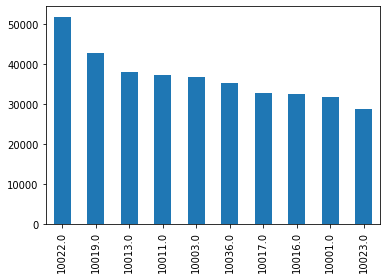

In [ ]:
borough = df['borough']=='MANHATTAN'
zips = df[borough]['zip_code'].value_counts().head(10)
zips.plot(kind="bar")

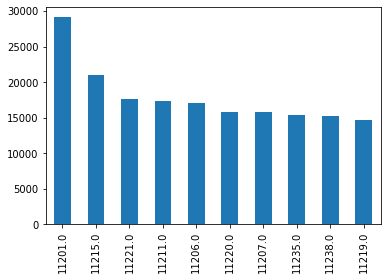

In [ ]:
borough = df['borough']=='BROOKLYN'
zips = df[borough]['zip_code'].value_counts().head(10)
zips.plot(kind="bar")

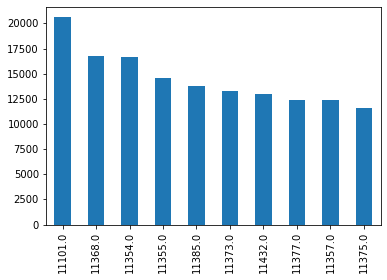

In [ ]:
borough = df['borough']=='QUEENS'
zips = df[borough]['zip_code'].value_counts().head(10)
zips.plot(kind="bar")

**Q2c**: Which 3 zipcodes have the most permits? Why do you think this is?

**Answer**: 10022, 10019, 10013. Mid-town and Chelsea have major construction projects underway (more permits issued). 

------------------------------------------------------

**Q3:** Show the mean time between when a job starts and the expiration date of its permit, by borough

In [ ]:
#hint: https://pandas.pydata.org/docs/reference/api/pandas.TimedeltaIndex.mean.html?highlight=mean%20time%20delta#pandas.TimedeltaIndex.mean

df['job_start_date'] = pd.to_datetime(df['job_start_date'], format='%m/%d/%Y', errors = 'coerce') #converting from str to datetime
df['expiration_date'] = pd.to_datetime(df['expiration_date'], format='%m/%d/%Y', errors = 'coerce') #converting from str to datetime
start = df['job_start_date']
expire = df['expiration_date']
borough = df['borough']

#I did not get this question. I kept getting an error that I could not resolve. plz see below
#pd.TimedeltaIndex.mean(expire,start) => TypeError: isna() missing 1 required positional argument: 'func'


**Qextra:** find some more interesting insights!

In [ ]:
df['job_start_date'] = pd.to_datetime(df['job_start_date'], format='%m/%d/%Y', errors = 'coerce') #converting from str to datetime
df['expiration_date'] = pd.to_datetime(df['expiration_date'], format='%m/%d/%Y', errors = 'coerce') #converting from str to datetime
start = df['job_start_date']
expire = df['expiration_date']
borough = df['borough']

pd.Series.mean(expire-start)  #yields this city-wide mean time between job starts and the expiration date of its permit. 

Timedelta('726 days 03:06:39.451031688')